# import packages and files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train=pd.read_csv('MLProject_train.csv')

In [3]:
test=pd.read_csv('MLProject_test.csv')

In [5]:
train.info(),test.info() #all variables are either float or int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483087 entries, 0 to 483086
Columns: 150 entries, A1 to target2
dtypes: float64(135), int64(15)
memory usage: 552.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115299 entries, 0 to 115298
Columns: 150 entries, A1 to target2
dtypes: float64(136), int64(14)
memory usage: 131.9 MB


(None, None)

In [8]:
#inspect the categorical Z2
train['Z2'].describe()   #it's float in python

count    483087.000000
mean          3.030347
std           1.419200
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Z2, dtype: float64

In [12]:
train.iloc[:,-2:]

,target1,target2
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
483082,0,1
483083,0,0
483084,0,1
483085,0,0


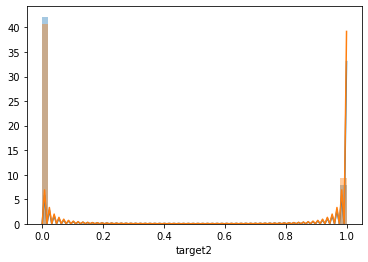

In [15]:
sns.distplot(train['target1']),
sns.distplot(train['target2'])

# Prep the data

## save targets to labels

In [6]:
# Labels are the values we want to predict
labels = train.loc[:,'target1': 'target2']

labels_test=test.loc[:,'target1': 'target2']

In [69]:
labels

,target1,target2
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
483082,0,1
483083,0,0
483084,0,1
483085,0,0


## Remove target from train

In [7]:
#remove target variable from the dataset

train= train.drop(['target1', 'target2'], axis = 1)
test=test.drop(['target1', 'target2'], axis = 1)
train.shape

(483087, 148)

In [53]:
# Saving column names for later use
train_list = list(train.columns)
# Convert to numpy array
train_list_array = np.array(train_list)

# Data Cleaning

## Impute missing values

In [23]:
#check for missing values
def missing_df(df):
    missing_df=pd.DataFrame(df.apply(lambda x:sum(x.isnull())/len(df)))
    missing_df.columns=['pct_missing']
    missing_df=missing_df.sort_values(by='pct_missing', ascending=False)
    return missing_df

In [26]:
missing=missing_df(train)

In [27]:
missing.head(20)

,pct_missing
X6,0.000807
T6,0.000807
L6,0.000807
N6,0.000807
M6,0.000807
U6,0.000807
V6,0.000807
W6,0.000807
Z4,0.000000
T4,0.000000


In [29]:
sum(missing['pct_missing']!=0) #eight variables have missing values

8

In [33]:
#impute for missing values
#investigate the eight missing values first
col_missing=missing.loc[missing['pct_missing']!=0,:]
#col_missing=missing.columns(missing['pct_missing']!=0)

In [35]:
col_missing=col_missing.index

In [36]:
col_missing

Index(['X6', 'T6', 'L6', 'N6', 'M6', 'U6', 'V6', 'W6'], dtype='object')

In [37]:
#select those variables from training
train_missing=train.loc[:,col_missing]

In [38]:
train_missing.describe() #nothing out of ordinary, could impute with mean...

,X6,T6,L6,N6,M6,U6,V6,W6
count,482697.000000,482697.000000,482697.000000,482697.000000,482697.000000,482697.000000,482697.000000,482697.000000
mean,0.080901,0.091058,0.143021,0.145081,0.147141,0.145260,0.150237,0.147749
std,0.034916,0.042545,0.040677,0.040592,0.042429,0.037008,0.038462,0.036941
min,-0.025900,-0.041500,0.073900,0.082200,0.074900,0.083500,0.084600,0.086700
25%,0.058200,0.063200,0.116700,0.118600,0.119600,0.120800,0.125400,0.123700
50%,0.081800,0.091400,0.133000,0.134800,0.136700,0.136400,0.140100,0.138400
75%,0.103000,0.118200,0.157700,0.158400,0.160600,0.159200,0.161600,0.160000
max,0.212600,0.294700,0.337900,0.407400,0.477000,0.321000,0.433700,0.377300


In [43]:
#impute missing variables in train with mean
train_nomissing=train.apply(lambda x: x.fillna(x.mean()))

In [44]:
train_nomissing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483087 entries, 0 to 483086
Columns: 148 entries, A1 to X6
dtypes: float64(135), int64(13)
memory usage: 545.5 MB


In [45]:
train_nomissing.loc[:,col_missing].info()  #confirm that missing values are being imputed. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483087 entries, 0 to 483086
Data columns (total 8 columns):
X6    483087 non-null float64
T6    483087 non-null float64
L6    483087 non-null float64
N6    483087 non-null float64
M6    483087 non-null float64
U6    483087 non-null float64
V6    483087 non-null float64
W6    483087 non-null float64
dtypes: float64(8)
memory usage: 29.5 MB


In [46]:
#=missing_df(train_nomissing)

In [47]:
#sum(missing['pct_missing']!=0)

0

## Feature scaling

In [48]:
from sklearn.preprocessing import StandardScaler


In [49]:
scaler = StandardScaler() #scale to ensure models are properly trained. 
scaled_train = scaler.fit_transform(train_nomissing)


In [54]:
scaled_train=pd.DataFrame(scaled_train) #from array to dataframe
scaled_train.columns=train_list  #put back column names

In [55]:
scaled_train.head()

,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,...,N6,P6,Q6,R6,S6,T6,U6,V6,W6,X6
0,-0.066579,-0.934318,-0.469450,-0.506597,-0.133234,0.070210,-0.013717,-0.109775,-0.950130,0.783375,...,-0.835023,-0.916355,-0.643895,-0.627935,-0.766902,0.487725,-0.745009,-0.963339,-0.876038,0.249252
1,0.666044,-0.765331,-0.047211,-0.170278,0.405617,0.048964,-0.132080,-0.187295,1.461399,-0.743244,...,0.301141,0.276562,-0.010507,0.070777,-0.068686,0.974465,0.363311,0.220123,0.296575,0.896785
2,-0.702470,-1.016280,-0.072957,-0.173203,0.328610,-0.023910,-0.022903,-0.032251,-0.827062,0.864728,...,-0.260779,-0.350174,-0.235418,-0.367725,-0.287302,0.948599,-0.455765,-0.320888,-0.393994,0.722009
3,-0.511930,-0.785557,0.385326,0.584245,-0.086259,-0.036840,0.022922,-0.118640,1.260840,-0.886362,...,0.192700,0.767050,0.350012,0.878713,0.502427,0.210260,0.106505,0.053658,0.079926,0.140374
4,-0.685550,-1.017819,-0.139897,-0.290183,0.417981,-0.032922,-0.084394,-0.037241,1.420166,-1.081221,...,-0.263244,-0.335035,-0.131231,-0.293838,-0.287302,-0.276479,-0.685538,-0.175231,-0.434616,-0.475643


# Establish a baseline model

In [57]:
# The baseline model is the logistic regression
from sklearn.linear_model import LogisticRegression

In [73]:
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(scaled_train, labels.iloc[:,0]) #use target1

C:\Users\Lu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
from sklearn.metrics import roc_auc_score


logreg_predictions1 = log_reg.predict(scaled_train)
log_roc1 = roc_auc_score(labels.iloc[:,0], logreg_predictions1)
log_roc1  #baseline roc on target1


0.5735839804599484

In [83]:
log_reg.fit(scaled_train, labels.iloc[:,1]) #predict target2
logreg_predictions2 = log_reg.predict(scaled_train)

log_roc2 = roc_auc_score(labels.iloc[:,1], logreg_predictions2)
log_roc2 #baseline roc on target2

C:\Users\Lu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.6011926309633976

# Gradient boosting

In [84]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

NameError: name 'X' is not defined

# XGboost 
https://xgboost.readthedocs.io/en/latest/tutorials/index.html

In [9]:
#conda install -c anaconda py-xgboost
import xgboost as xgb

## Cross-validation in XGBoost

In [16]:
train_dmatrix = xgb.DMatrix(train,
label=labels.iloc[:,0])
params={"objective":"binary:logistic","max_depth":4}
cv_results = xgb.cv(dtrain=train_dmatrix, params=params, nfold=4,
num_boost_round=10, metrics="auc", as_pandas=True)  #measuring AUC
#print("Accuracy: %f" %((1-cv_results["test-error-mean"]).iloc[-1]))

In [18]:
cv_results['test-auc-mean'].mean()

0.8230641750000001

### fine tune the model

Eta and overfitting: https://mlexplained.com/2018/01/29/learning-rate-tuning-in-deep-learning-a-practical-guide/
